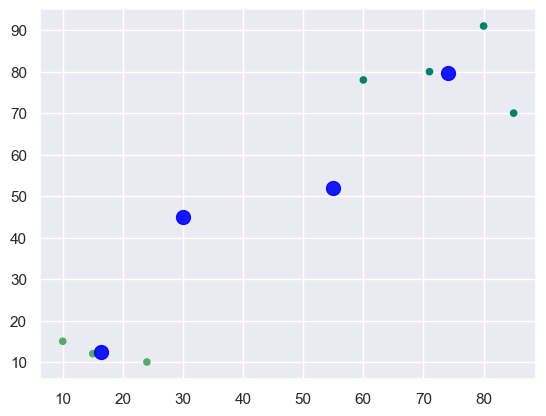

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

x = np.array([[10, 15],
             [15, 12],
             [24, 10],
             [30, 45],
             [85, 70],
             [71, 80],
             [60, 78],
             [55, 52],
             [80, 91]])


#x, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
#plt.scatter(x[:, 0], x[:, 1], s = 20)
#plt.show()

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)


plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.81      1.00      0.89        17
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



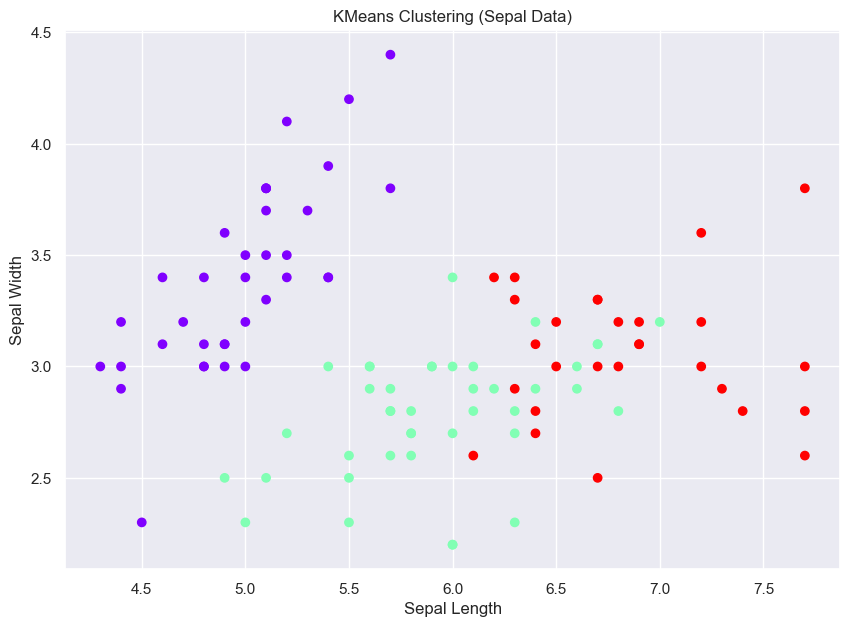

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn import datasets
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names 
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3, random_state=0)
model.fit(train_data)
model_predictions = model.predict(test_data)

print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

plt.figure(figsize=(10, 7))
plt.scatter(train_data['sepal length (cm)'], train_data['sepal width (cm)'], c=model.labels_, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering (Sepal Data)')

plt.show()

<Figure size 5040x2160 with 0 Axes>

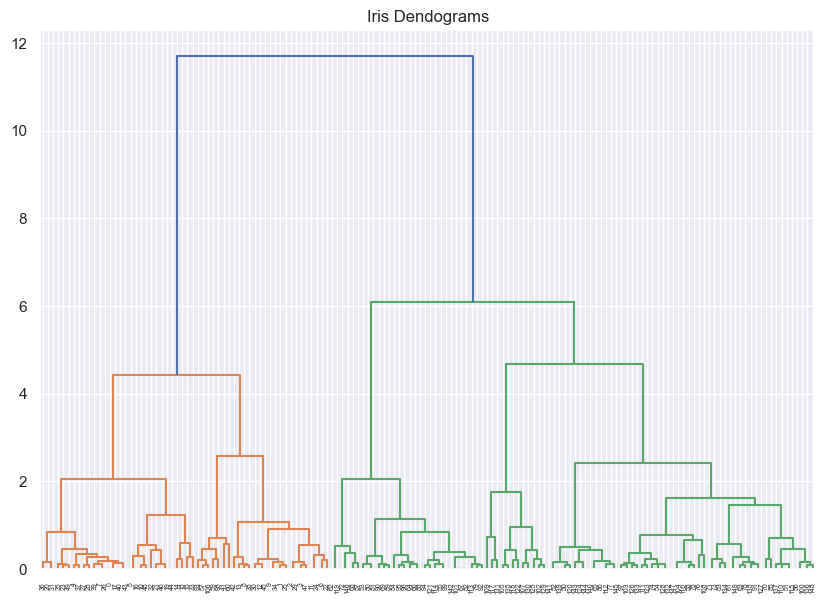

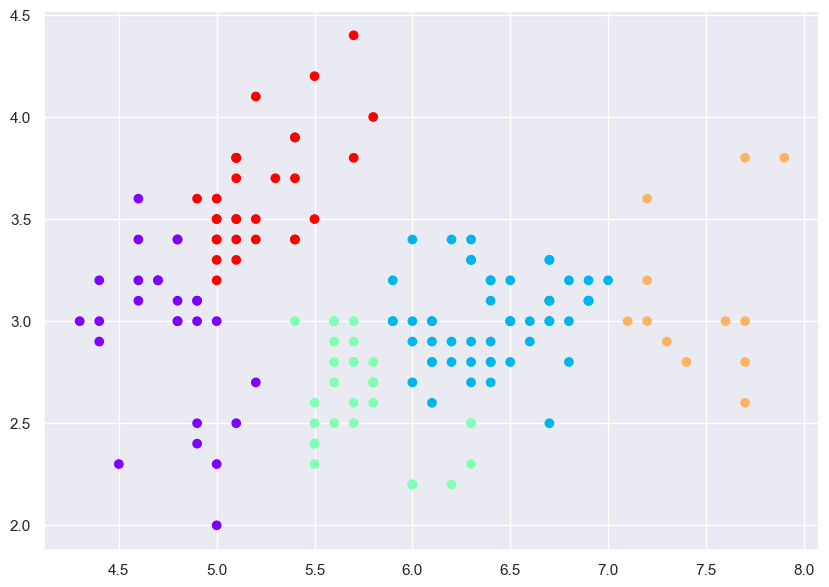

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris_data = pd.read_csv(url)
iris_data.head()
data = iris_data.iloc[:, 0:2].values
plt.figure(figsize=(28, 12), dpi = 180)
plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')